## <center>**Observations**</center>

### Initialisation:

Install required libraries -

In [34]:
%pip install numpy pandas networkx matplotlib pyvis plotly seaborn

Note: you may need to restart the kernel to use updated packages.


Import modules and libraries -

In [35]:
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import pandas as pd
import numpy as np
import collections

Create the graphs -

In [36]:
def create_atlas_graph(data):
    """
    Creates a directed graph for the input.
    
    Parameters:
        data (list): A list of place names (countries/cities).
    
    Returns:
        G (networkx.DiGraph): A directed graph.
    """
    G = nx.DiGraph()
    
    for place in data:
        G.add_node(place)
        last_letter = place[-1].lower()  # last letter of the name, case-insensitive comparison
        for candidate in data:
            if candidate[0].lower() == last_letter:
                G.add_edge(place, candidate)
    
    return G

with open("/Users/mago/Desktop/Atlas/data/countries.txt", "r") as file:
    countries = [line.strip() for line in file]

with open("/Users/mago/Desktop/Atlas/data/cities.txt", "r") as file:
    cities = [line.strip() for line in file]

combined = countries + cities

country_graph = create_atlas_graph(countries)
city_graph = create_atlas_graph(cities)
combined_graph = create_atlas_graph(combined)

### Observations:

##### DEGREE DISTRIBUTION - GRAPH DENSITY

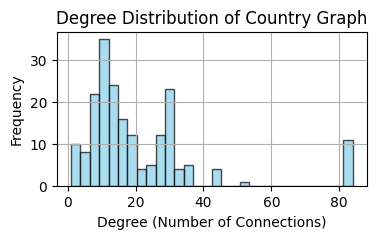

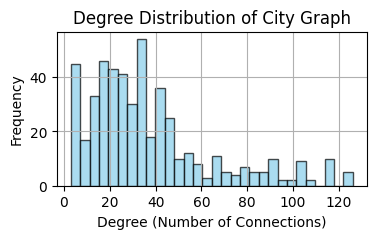

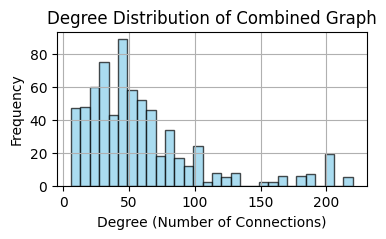

In [37]:
def plot_degree_distribution(G, title):
    """
    Plots the degree distribution of a graph.
    
    Parameters:
        G (networkx.Graph): The graph to analyze.
        title (str): Title for the plot.
    """
    degrees = [G.degree(n) for n in G.nodes()]
    
    plt.figure(figsize=(4, 2))
    plt.hist(degrees, bins=30, alpha=0.7, color="skyblue", edgecolor="black")
    plt.xlabel("Degree (Number of Connections)")
    plt.ylabel("Frequency")
    plt.title(f"Degree Distribution of {title}")
    plt.grid(True)
    plt.show()

# Run for all three graphs
plot_degree_distribution(country_graph, "Country Graph")
plot_degree_distribution(city_graph, "City Graph")
plot_degree_distribution(combined_graph, "Combined Graph")

##### TOP DEGREE NODES - GRAPH POPULARITY

In [8]:
country_centrality = nx.degree_centrality(country_graph)
city_centrality = nx.degree_centrality(city_graph)
combined_centrality = nx.degree_centrality(combined_graph)

# data is of form [(country, centrality), ...] so we will sort it descending by centrality and slice for the top 10

print("Country Graph Centrality:")
print(sorted(country_centrality.items(), key=lambda x: x[1], reverse=True)[:10])
print("\nCity Graph Centrality:")
print(sorted(city_centrality.items(), key=lambda x: x[1], reverse=True)[:10])
print("\nCombined Graph Centrality:")
print(sorted(combined_centrality.items(), key=lambda x: x[1], reverse=True)[:10])

Country Graph Centrality:
['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', "Côte d'Ivoire", 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Federated States of Micronesia', 'Fiji', 'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'Indi

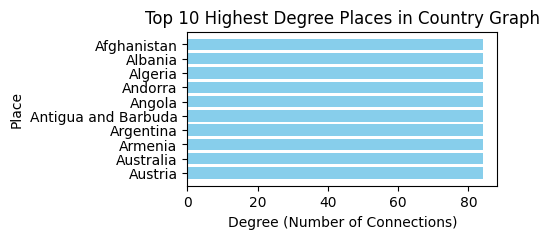

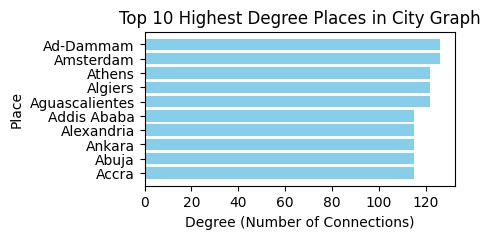

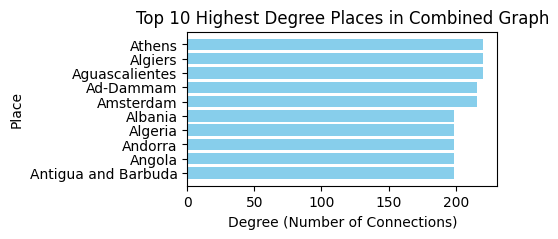

In [ ]:
def plot_top_degree_nodes(G, title):
    """
    Plots the top 10 highest-degree nodes in a graph.
    
    Parameters:
        G (networkx.Graph): The graph to analyze.
        title (str): Title for the plot.
    """
    degree_dict = dict(G.degree())
    sorted_degree = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:10]
    
    # convert to dataframe for ease of plotting
    df = pd.DataFrame(sorted_degree, columns=["Place", "Degree"])
    
    plt.figure(figsize=(4, 2))
    plt.barh(df["Place"], df["Degree"], color="skyblue")
    plt.xlabel("Degree (Number of Connections)")
    plt.ylabel("Place")
    plt.title("Top 10 Highest Degree Places in " + title)
    plt.gca().invert_yaxis()  # Highest degree at the top
    plt.show()

plot_top_degree_nodes(country_graph, "Country Graph")
plot_top_degree_nodes(city_graph, "City Graph")
plot_top_degree_nodes(combined_graph, "Combined Graph")

##### CLUSTERING COEFFICIENTS - GRAPH CLUSTERING

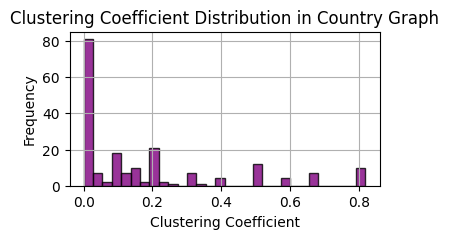

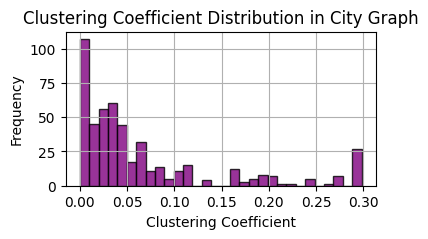

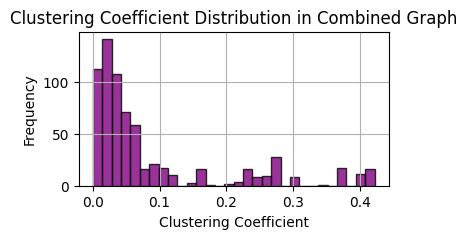

In [ ]:
def plot_clustering_coefficient(G, title):
    """
    Plots the clustering coefficient distribution of a graph.
    
    Parameters:
        G (networkx.Graph): The graph to analyze.
        title (str): Title for the plot.
    """
    clustering_coeffs = list(nx.clustering(G).values())
    
    plt.figure(figsize=(4, 2))
    plt.hist(clustering_coeffs, bins=30, color="purple", edgecolor="black", alpha=0.8)
    plt.xlabel("Clustering Coefficient")
    plt.ylabel("Frequency")
    plt.title("Clustering Coefficient Distribution in " + title)
    plt.grid(True)
    plt.show()

plot_clustering_coefficient(country_graph, "Country Graph")
plot_clustering_coefficient(city_graph, "City Graph")
plot_clustering_coefficient(combined_graph, "Combined Graph")

##### DATASET VISUALISATION

['a', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 't', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 'b', 'b', 'h', 'h', 'h', 'b', 'b', 'b', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'b', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'b', 'b', 'b', 'b', 'b', 'b', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'b', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'b', 'b', 'o', 'b', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'd', 'd', 'd', 'd', 'd', 'r', 'k', 'k', 'k', 'k', 'k', 'k', 'r', 'r', 'r', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 'f', 'f', 'f', 'g', 'g', 'g', 'y', 'g', 'g', 'g', 'g', 'g', 'g', 'u', 'u', 'u', 'u', 'u', 'u', 'u', 'g', 'q', 'j', 'j', 'j', 'f', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'v', 'v', 'v', 'v', 'z', 'z']
['n', 'a', 'a', 'u'

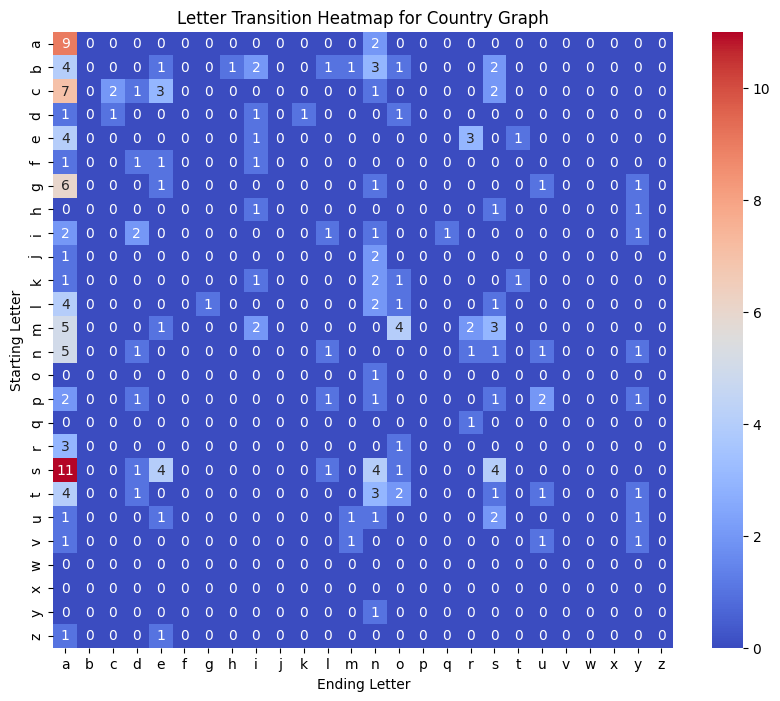

['t', 'o', 'o', 'o', 'o', 'o', 'd', 'i', 'i', 'i', 'i', 'i', 'i', 's', 'd', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 's', 'c', 'm', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'm', 'c', 'k', 'k', 'l', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'b', 'k', 'm', 'u', 'u', 'u', 't', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'e', 'e', 'e', 'b', 'r', 'm', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'c', 'b', 'j', 'p', 'b', 'k', 'k', 'k',

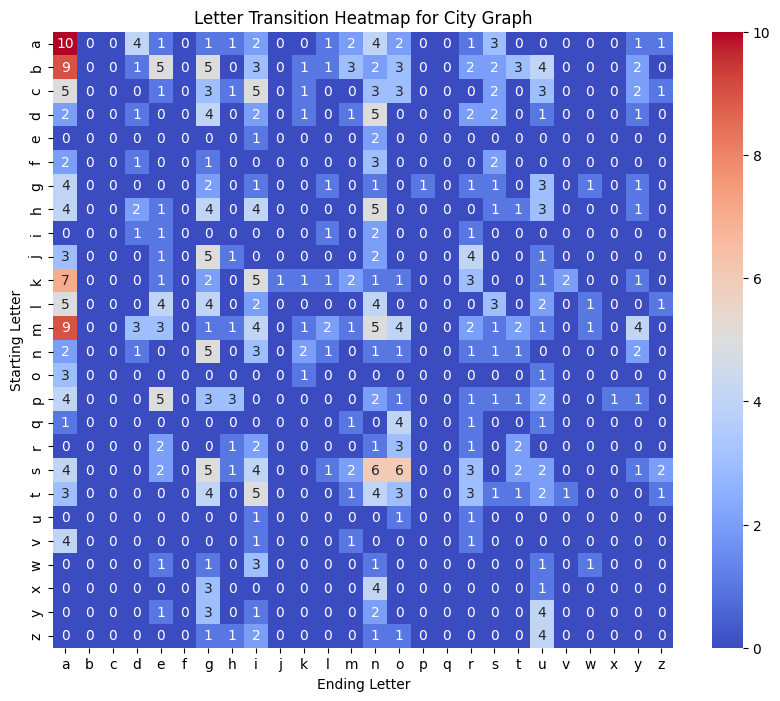

['a', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 't', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 'b', 'b', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'b', 'b', 'b', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm',

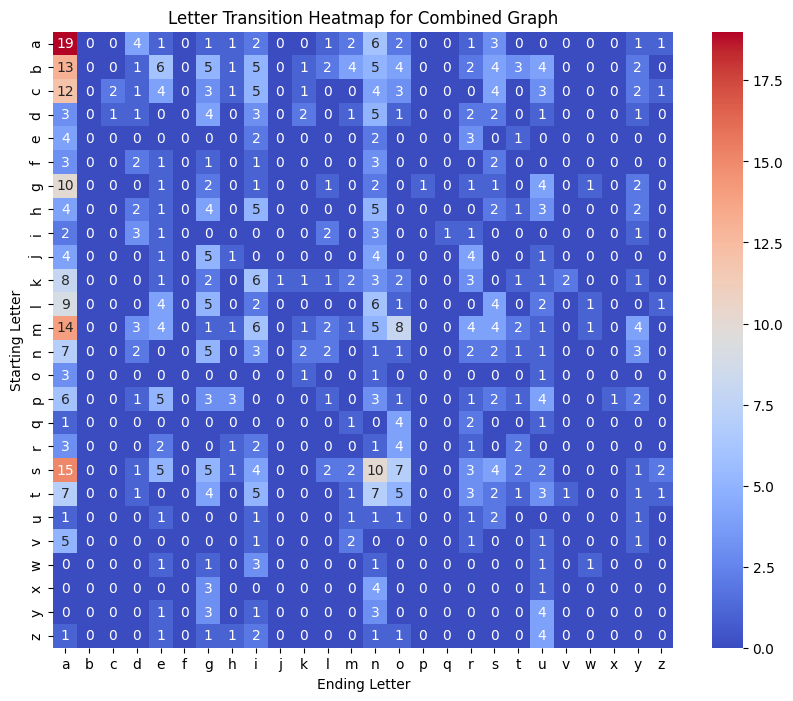

In [ ]:
def plot_letter_heatmap(G, title):
    """
    Plots a heatmap showing the frequency of starting vs. ending letters in a graph.
    
    Parameters:
        G (networkx.Graph): The graph to analyze.
        title (str): Title for the plot.
    """
    start = []
    end = []
    for node in G.nodes():
        start.append(node[0].lower())
        end.append(node[-1].lower())

    # print(start)
    # print(end)
    
    # 2D array to represent dataset by starting and ending letter
    letter_freq = np.zeros((26, 26))
    
    for i in range(len(start)):
        start_idx = ord(start[i]) - ord("a")
        end_idx = ord(end[i]) - ord("a")
        if 0 <= start_idx < 26 and 0 <= end_idx < 26:
            letter_freq[start_idx][end_idx] += 1
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(letter_freq, annot=True, fmt=".0f", cmap="coolwarm", xticklabels=[chr(i) for i in range(97, 123)], yticklabels=[chr(i) for i in range(97, 123)])
    plt.xlabel("Ending Letter")
    plt.ylabel("Starting Letter")
    plt.title("Letter Transition Heatmap for " + title)
    plt.show()

plot_letter_heatmap(country_graph, "Country Graph")
plot_letter_heatmap(city_graph, "City Graph")
plot_letter_heatmap(combined_graph, "Combined Graph")

##### NUMBER OF INCOMING EDGES - GRAPH CONNECTIVITY

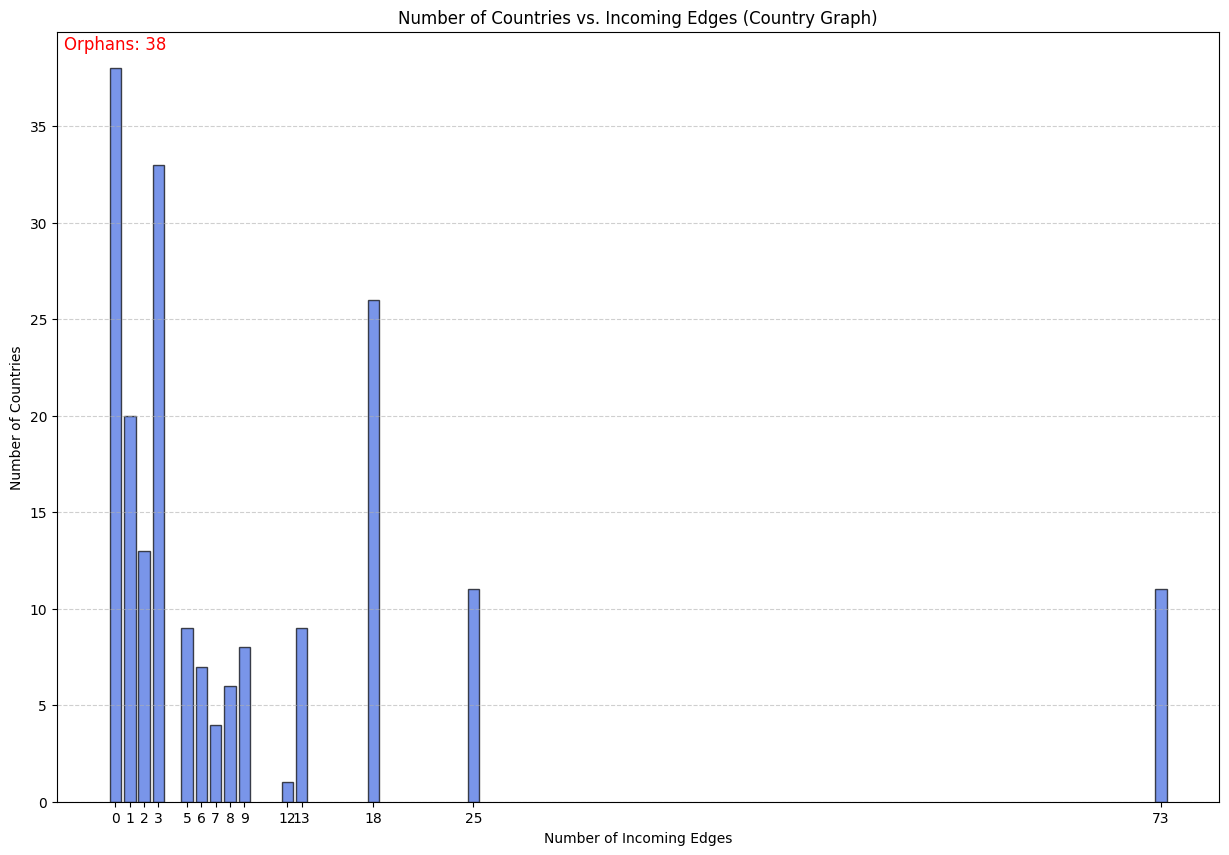

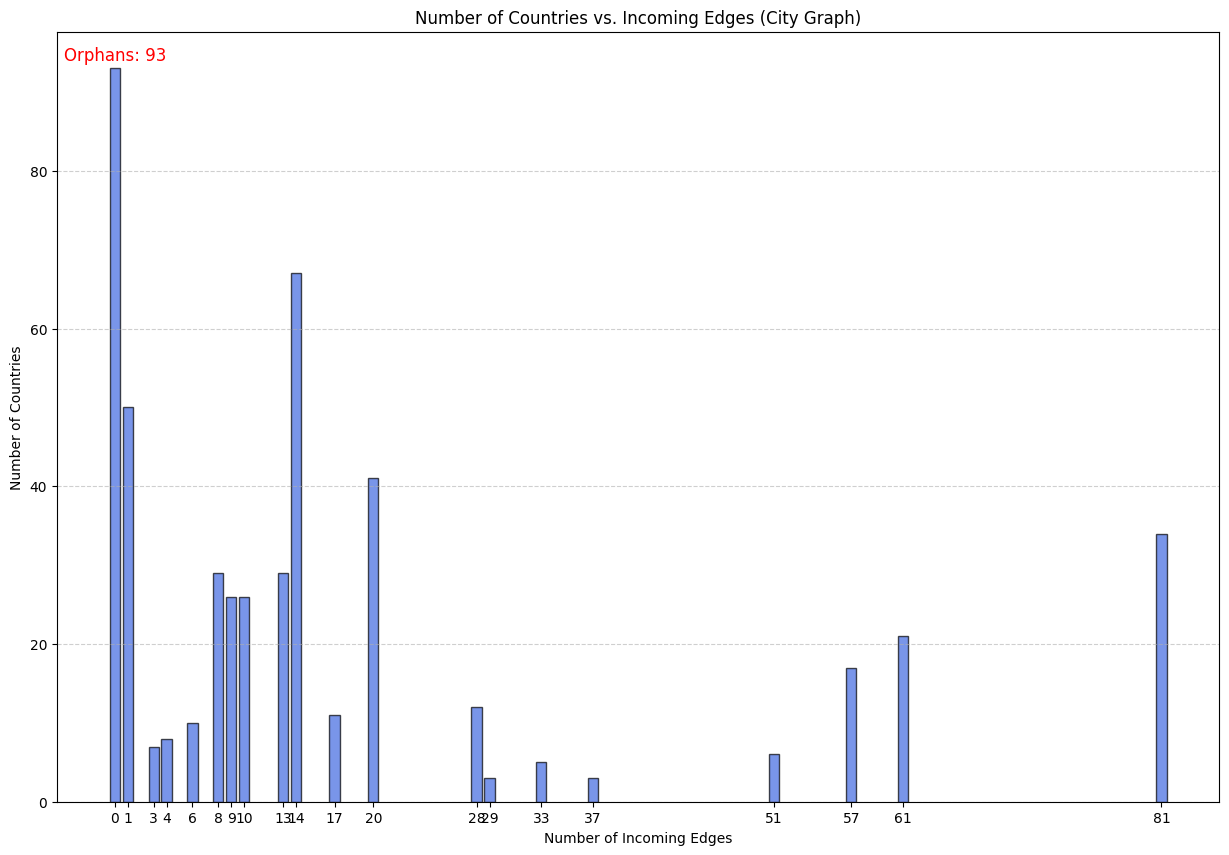

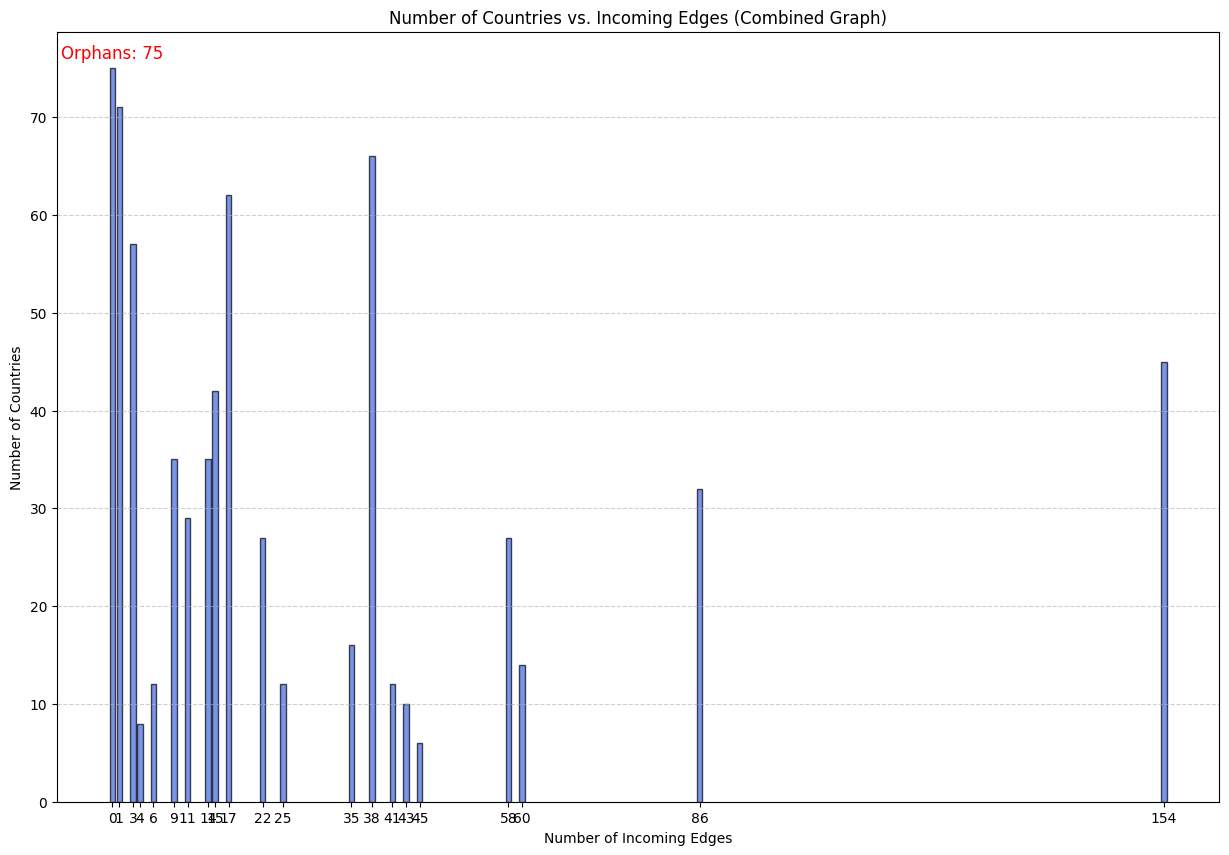

In [9]:
def plot_incoming_edges_distribution(G, title):
    """
    Plots the distribution of incoming edges for nodes in the graph.
    
    Parameters:
        G (networkx.DiGraph): The directed graph to analyze.
        title (str): Title for the plot.
    """
    in_degrees = []
    for node in G.nodes():
        in_degrees.append(G.in_degree(node))

    # Count occurrences of each in-degree value
    in_degree_counts = collections.Counter(in_degrees)

    plt.figure(figsize=(15, 10))
    plt.bar(in_degree_counts.keys(), in_degree_counts.values(), color="royalblue", edgecolor="black", alpha=0.7)
    plt.xlabel("Number of Incoming Edges")
    plt.ylabel("Number of Countries")
    plt.title("Number of Countries vs. Incoming Edges in " + title)
    plt.xticks(sorted(in_degree_counts.keys()))  # Only show existing degrees
    plt.grid(axis="y", linestyle="--", alpha=0.6)

    # Highlight orphan nodes (nodes with 0 incoming edges)
    if 0 in in_degree_counts:
        plt.text(0, in_degree_counts[0] + 1, f"Orphans: {in_degree_counts[0]}", color="red", fontsize=12, ha="center")

    plt.show()

plot_incoming_edges_distribution(country_graph, "Country Graph")
plot_incoming_edges_distribution(city_graph, "City Graph")
plot_incoming_edges_distribution(combined_graph, "Combined Graph")

##### NUMBER OF OUTGOING EDGES - GRAPH CONNECTIVITY

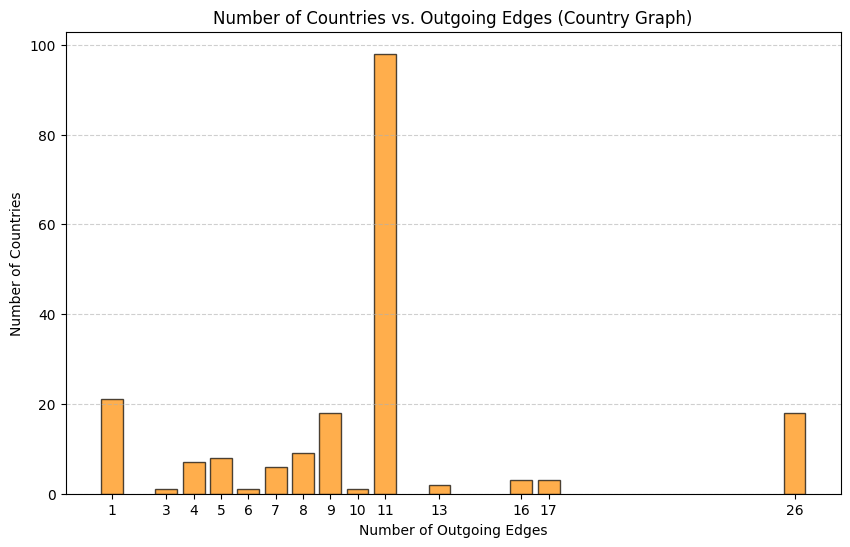

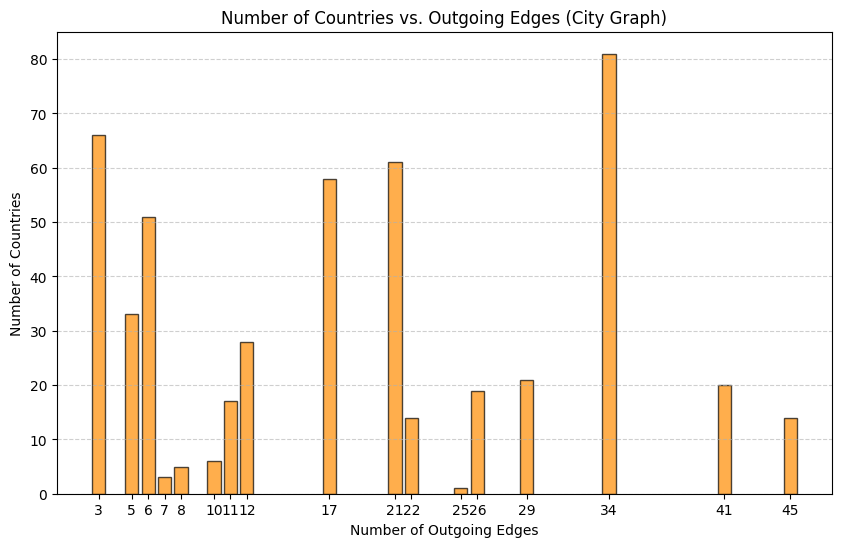

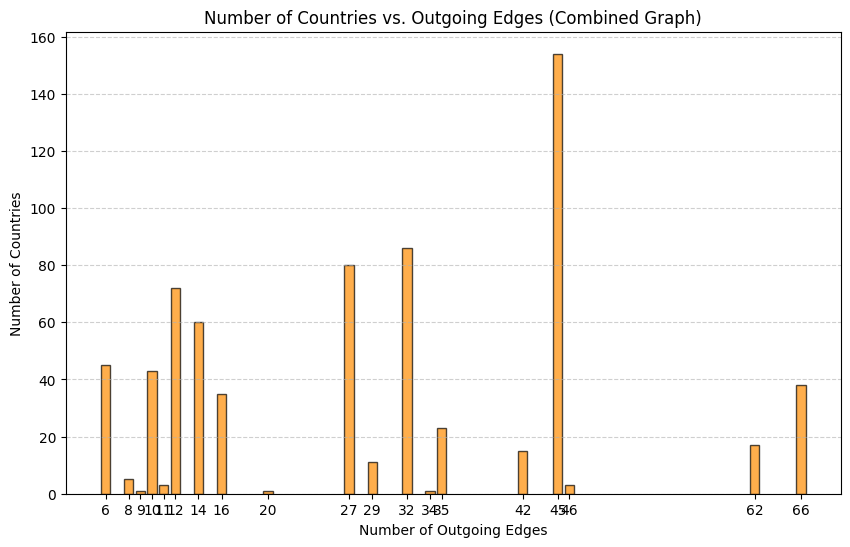

In [10]:
def plot_outgoing_edges_distribution(G, title):
    """
    Plots the distribution of outgoing edges for nodes in the graph.
    
    Parameters:
        G (networkx.DiGraph): The directed graph to analyze.
        title (str): Title for the plot.
    """
    out_degrees = []
    for node in G.nodes():
        out_degrees.append(G.out_degree(node))

    # Count occurrences of each out-degree value
    out_degree_counts = collections.Counter(out_degrees)

    plt.figure(figsize=(10, 6))
    plt.bar(out_degree_counts.keys(), out_degree_counts.values(), color="darkorange", edgecolor="black", alpha=0.7)
    plt.xlabel("Number of Outgoing Edges")
    plt.ylabel("Number of Countries")
    plt.title(f"Number of Countries vs. Outgoing Edges ({title})")
    plt.xticks(sorted(out_degree_counts.keys()))  # Only show existing degrees
    plt.grid(axis="y", linestyle="--", alpha=0.6)

    # Highlight dead-end nodes (nodes with 0 outgoing edges)
    if 0 in out_degree_counts:
        plt.text(0, out_degree_counts[0] + 1, f"Dead Ends: {out_degree_counts[0]}", color="red", fontsize=12, ha="center")

    plt.show()

plot_outgoing_edges_distribution(country_graph, "Country Graph")
plot_outgoing_edges_distribution(city_graph, "City Graph")
plot_outgoing_edges_distribution(combined_graph, "Combined Graph")

##### DIAMETER COMPUTATION

In [11]:
def compute_diameter_with_path(G, title):
    """
    Computes and prints the diameter of the largest strongly connected component (SCC),
    along with the start and end nodes of the longest shortest path.
    
    Parameters:
        G (networkx.DiGraph): The directed graph to analyze.
        title (str): Title for the graph.
    """
    # Get the largest Strongly Connected Component (SCC)
    largest_scc = max(nx.strongly_connected_components(G), key=len)
    subgraph = G.subgraph(largest_scc)

    # Compute shortest path lengths between all pairs
    shortest_paths = dict(nx.all_pairs_shortest_path_length(subgraph))

    # Find the longest shortest path (Diameter)
    max_distance = 0
    start_node, end_node = None, None

    for node1 in shortest_paths:
        for node2, distance in shortest_paths[node1].items():
            if distance > max_distance:
                max_distance = distance
                start_node, end_node = node1, node2

    print(f"Diameter of {title}: {max_distance}")
    print(f"Start Node: {start_node}")
    print(f"End Node: {end_node}")

    # Find the actual path for better visualization
    longest_path = nx.shortest_path(subgraph, source=start_node, target=end_node)

    print(f"Longest Shortest Path: {' → '.join(longest_path)}")

compute_diameter_with_path(country_graph, "Country Graph")
compute_diameter_with_path(city_graph, "City Graph")
compute_diameter_with_path(combined_graph, "Combined Graph")


Diameter of Country Graph: 7
Start Node: Iraq
End Node: The Bahamas
Longest Shortest Path: Iraq → Qatar → Republic of the Congo → Oman → Nauru → Ukraine → Egypt → The Bahamas
Diameter of City Graph: 6
Start Node: Ouagadougou
End Node: Xi-an
Longest Shortest Path: Ouagadougou → Urumqi → Istanbul → Luoyang → Gaziantep → Phoenix → Xi-an
Diameter of Combined Graph: 5
Start Node: Nauru
End Node: Xi-an
Longest Shortest Path: Nauru → Uganda → Anyang → Gaziantep → Phoenix → Xi-an


##### REMOVING CYCLES AND FINDING LONGEST PATH

In [12]:
def remove_cycles(G):
    """
    Converts a directed graph into a DAG (Directed Acyclic Graph)
    by removing cycles using a heuristic approach.
    
    Parameters:
        G (networkx.DiGraph): The original directed graph.

    Returns:
        DAG (networkx.DiGraph): Acyclic subgraph of G.
    """
    DAG = G.copy()
    try:
        while not nx.is_directed_acyclic_graph(DAG):
            cycle = nx.find_cycle(DAG, orientation='original')
            u, v, _ = cycle[0]  # Extract only the source and target nodes
            DAG.remove_edge(u, v)  # Remove the edge

    except nx.NetworkXNoCycle:
        # No more cycles to remove
        pass

    return DAG

def longest_path_in_dag(G):
    """
    Finds the longest path in a Directed Acyclic Graph (DAG) using topological sorting.
    
    Parameters:
        G (networkx.DiGraph): The DAG.

    Returns:
        longest_path (list): Nodes in the longest path.
        longest_length (int): Length of the longest path.
    """
    if not nx.is_directed_acyclic_graph(G):
        raise ValueError("Graph is not a DAG!")

    # Compute longest path using topological sorting + dynamic programming
    topological_order = list(nx.topological_sort(G))
    longest_path_length = {node: 0 for node in G.nodes()}
    predecessor = {node: None for node in G.nodes()}

    for node in topological_order:
        for neighbor in G.successors(node):
            if longest_path_length[neighbor] < longest_path_length[node] + 1:
                longest_path_length[neighbor] = longest_path_length[node] + 1
                predecessor[neighbor] = node

    # Find the node with the maximum longest path length
    end_node = max(longest_path_length, key=longest_path_length.get)
    longest_length = longest_path_length[end_node]

    # Backtrack to find the longest path sequence
    longest_path = []
    while end_node is not None:
        longest_path.append(end_node)
        end_node = predecessor[end_node]
    longest_path.reverse()  # Start to end

    return longest_path, longest_length

def compute_longest_path(G, title):
    """
    Computes and prints the longest path in a given directed graph.
    
    Parameters:
        G (networkx.DiGraph): The directed graph to analyze.
        title (str): Title for the graph.
    """
    # Step 1: Remove cycles to create a DAG
    DAG = remove_cycles(G)
    
    # Step 2: Find the longest path in the DAG
    longest_path, longest_length = longest_path_in_dag(DAG)
    
    print(f"Longest Path in {title}: {longest_length} steps")
    print(" → ".join(longest_path))

compute_longest_path(country_graph, "Country Graph")
compute_longest_path(city_graph, "City Graph")
compute_longest_path(combined_graph, "Combined Graph")

Longest Path in Country Graph: 25 steps
Kuwait → Thailand → Dominican Republic → Czech Republic → Chad → Djibouti → Israel → Laos → Solomon Islands → Seychelles → Sao Tome and Principe → Egypt → The Bahamas → South Korea → Austria → Australia → Armenia → Argentina → Antigua and Barbuda → Angola → Andorra → Algeria → Albania → Azerbaijan → North Korea → Afghanistan
Longest Path in City Graph: 46 steps
Visakhapatnam → Malappuram → Munich → Hohhot → Tashkent → Thiruvananthapuram → Madrid → Dhanbad → Dar es Salaam → Minsk → Krasnoyarsk → Khartoum → Manchester → Raipur → Riyadh → Harare → Esfahan → Nanyang Henan → Nouakchott → Tianjin → Novosibirsk → Kabul → London → Naples → Seoul → Lagos → Shenyang → Gaoxiong → Guiyang → Guatemala City → Yangon → Nagoya → Aba → Astana → Antalya → Adana → Agra → Accra → Abuja → Ankara → Alexandria → Addis Ababa → Ahmedabad → Dubai → Izmir → Rio de Janeiro → Osaka
Longest Path in Combined Graph: 60 steps
Bangkok → Krasnoyarsk → Karaj → Jinzhou → Uruguay → Y